In [ ]:
Project Title : Customer Churn Analysis Prediction
Name : S Yugaash  Domain : Data Analytics 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
data = pd.read_csv('Telco-Customer-Churn.csv')

print(" Type information:")
print(data.dtypes)

 Type information:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [27]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce') # convert TotalCharges to numeric

data = data.dropna(subset=['TotalCharges']) # drop rows with missing values

print(" Type information:")
print(data['TotalCharges'].dtype)

 Type information:
float64


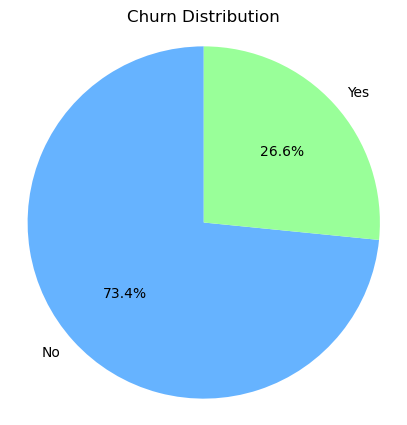

In [44]:
churn_counts = data['Churn'].value_counts() 

plt.figure(figsize=(5, 5))
plt.pie(churn_counts, labels = churn_counts.index, 
                               autopct='%1.1f%%',         # displays percentages on the pie chart
                               startangle=90, 
                               colors=['#66b3ff', '#99ff99'])

plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

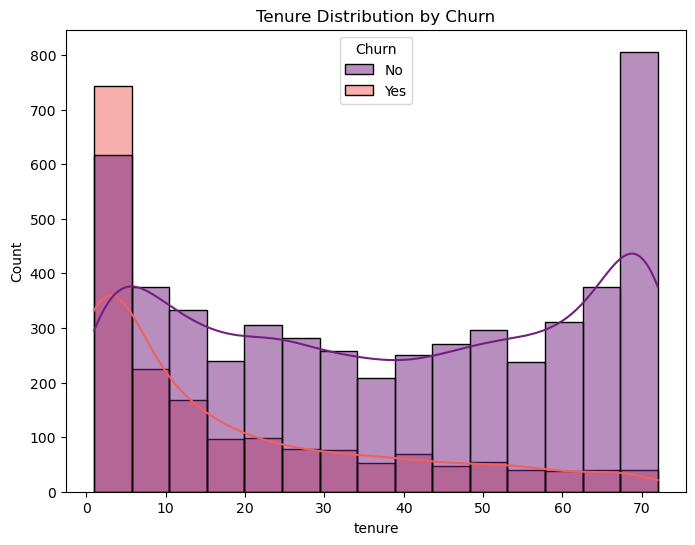

In [66]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='tenure', hue='Churn', kde=True, palette='magma')

plt.title('Tenure Distribution by Churn')
plt.show()

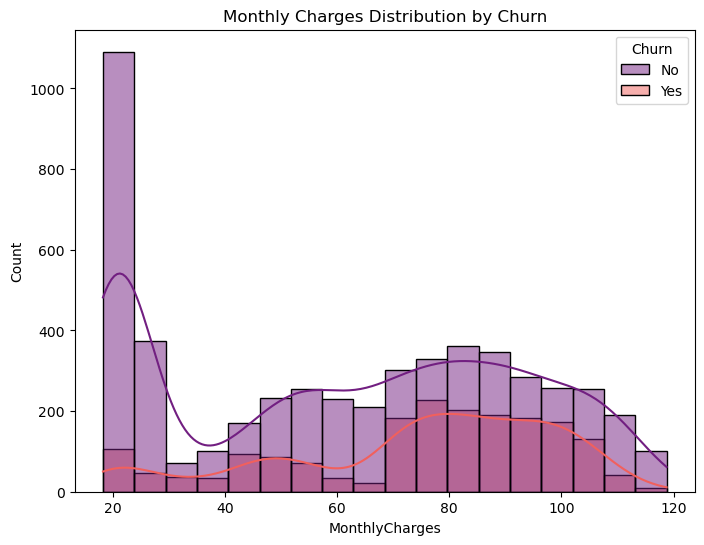

In [64]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', kde=True, palette='magma')

plt.title('Monthly Charges Distribution by Churn')
plt.show()

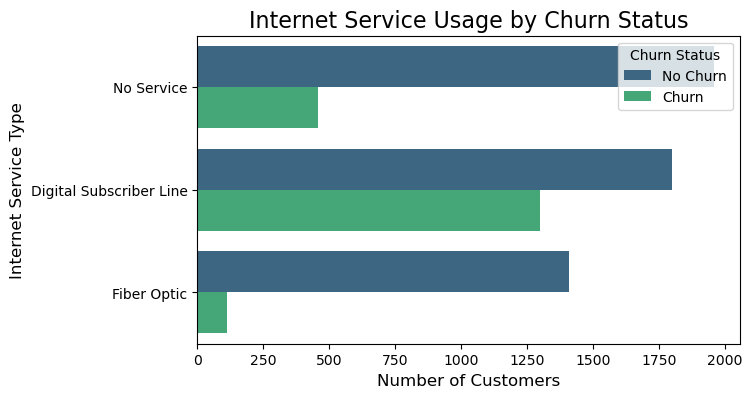

In [90]:
plt.figure(figsize=(7, 4))

ax = sns.countplot(y='InternetService', hue='Churn', data=data, palette='viridis')

plt.title('Internet Service Usage by Churn Status', fontsize=16)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Internet Service Type', fontsize=12)

ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['No Service', 'Digital Subscriber Line', 'Fiber Optic'])

plt.legend(title='Churn Status', labels=['No Churn', 'Churn'], loc='upper right')

plt.show()

In [ ]:

encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Define features (X) and target variable (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [104]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

X = data.drop(columns=['Churn'])
y = data['Churn']

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [120]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score (y_test, y_pred))

Accuracy: 0.7853589196872779


In [122]:
from sklearn.metrics import classification_report

print("Classification Report: \n", classification_report (y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



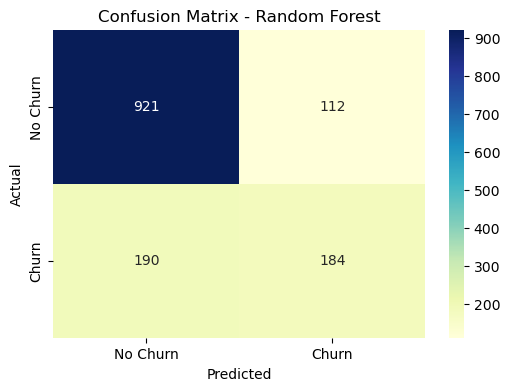

In [138]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6, 4))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="YlGnBu", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])

plt.title("Confusion Matrix - Random Forest")

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

In [148]:
print(X.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [156]:

selected_features = [col for col in X.columns if 'MonthlyCharges' in col or 'tenure' 
                       in col or  'InternetService' in col or 'ContractType' in col]

print("Selected Features:", selected_features)


Selected Features: ['tenure', 'InternetService', 'MonthlyCharges']


MonthlyCharges     0.146426
tenure             0.140968
InternetService    0.026098
dtype: float64


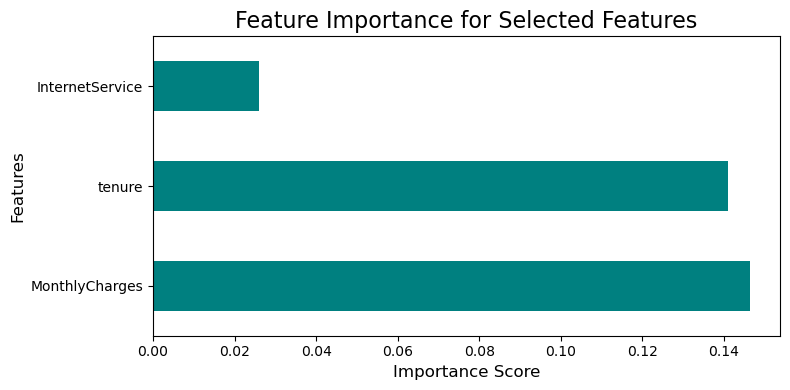

In [154]:
filtered_importance = feature_importance[selected_features].sort_values(ascending=False)

print(filtered_importance)

plt.figure(figsize=(8, 4))

filtered_importance.plot(kind='barh', color='teal')

plt.title('Feature Importance for Selected Features', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)

plt.tight_layout()
plt.show()
